In [3]:
!pip install pyspark
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Students Social Media Addiction.csv to Students Social Media Addiction (1).csv


In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SocialMediaAddictionAnalysis").getOrCreate()
df = spark.read.csv("Students Social Media Addiction.csv", header=True, inferSchema=True)

In [7]:
df.columns

['Student_ID',
 'Age',
 'Gender',
 'Academic_Level',
 'Country',
 'Avg_Daily_Usage_Hours',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Sleep_Hours_Per_Night',
 'Mental_Health_Score',
 'Relationship_Status',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

In [8]:
df.printSchema()

root
 |-- Student_ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Academic_Level: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Avg_Daily_Usage_Hours: double (nullable = true)
 |-- Most_Used_Platform: string (nullable = true)
 |-- Affects_Academic_Performance: string (nullable = true)
 |-- Sleep_Hours_Per_Night: double (nullable = true)
 |-- Mental_Health_Score: integer (nullable = true)
 |-- Relationship_Status: string (nullable = true)
 |-- Conflicts_Over_Social_Media: integer (nullable = true)
 |-- Addicted_Score: integer (nullable = true)



In [9]:
df.show()

+----------+---+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|Addicted_Score|
+----------+---+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|         1| 19|Female| Undergraduate| Bangladesh|                  5.2|         Instagram|                         Yes|                  6.5|                  6|    In Relationship|                          3|             8|
|         2| 22|  Male|      Graduate|      India|                  2.1|           Twitter|     

In [10]:
df.groupBy("Gender").avg("Avg_Daily_Usage_Hours").show()

+------+--------------------------+
|Gender|avg(Avg_Daily_Usage_Hours)|
+------+--------------------------+
|Female|         5.011048158640227|
|  Male|         4.826136363636363|
+------+--------------------------+



In [28]:
df.groupBy("Gender").avg("Mental_Health_Score").show()


+------+------------------------+
|Gender|avg(Mental_Health_Score)|
+------+------------------------+
|Female|       6.175637393767706|
|  Male|       6.278409090909091|
+------+------------------------+



In [27]:
df.groupBy("Academic_Level").avg("Avg_Daily_Usage_Hours").show()

+--------------+--------------------------+
|Academic_Level|avg(Avg_Daily_Usage_Hours)|
+--------------+--------------------------+
|   High School|         5.544444444444444|
| Undergraduate|           5.0014164305949|
|      Graduate|         4.776923076923076|
+--------------+--------------------------+



In [26]:
df.groupBy("Age").avg("Avg_Daily_Usage_Hours").show()


+---+--------------------------+
|Age|avg(Avg_Daily_Usage_Hours)|
+---+--------------------------+
| 22|         4.676190476190475|
| 20|        4.9303030303030315|
| 19|         5.120245398773009|
| 23|         4.508823529411766|
| 24|         5.046153846153847|
| 21|         4.950641025641025|
| 18|         5.385714285714286|
+---+--------------------------+



In [25]:
df.groupBy("country").avg("Avg_Daily_Usage_Hours").show()


+-----------+--------------------------+
|    country|avg(Avg_Daily_Usage_Hours)|
+-----------+--------------------------+
|     Russia|         5.190476190476191|
|   Paraguay|                       4.7|
|      Yemen|                       4.7|
|     Sweden|                       2.0|
|Philippines|                       4.8|
|  Singapore|                     5.275|
|   Malaysia|        5.3500000000000005|
|     Turkey|         5.303703703703703|
|   Trinidad|                       5.6|
|       Iraq|                       2.5|
|    Germany|        3.5214285714285714|
|Afghanistan|                       2.9|
|     Jordan|                       5.4|
|   Maldives|        4.5894736842105255|
|     France|         4.055555555555555|
|     Greece|                       3.2|
|     Kosovo|                       5.5|
|  Sri Lanka|         4.810526315789474|
|     Taiwan|                       2.6|
|   Slovakia|                       2.3|
+-----------+--------------------------+
only showing top

In [24]:
df.groupBy("Most_Used_Platform").avg("Avg_Daily_Usage_Hours").show()


+------------------+--------------------------+
|Most_Used_Platform|avg(Avg_Daily_Usage_Hours)|
+------------------+--------------------------+
|         VKontakte|                      4.25|
|         KakaoTalk|        4.7250000000000005|
|           YouTube|         4.079999999999999|
|            TikTok|         5.346103896103897|
|              LINE|                      3.25|
|         Instagram|        4.8722891566265085|
|           Twitter|                      4.87|
|          Snapchat|         5.092307692307694|
|          WhatsApp|         6.475925925925927|
|          LinkedIn|         2.519047619047619|
|            WeChat|                      4.96|
|          Facebook|         4.507317073170731|
+------------------+--------------------------+



In [23]:
df.select("Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night").describe().show()


+-------+---------------------+---------------------+
|summary|Avg_Daily_Usage_Hours|Sleep_Hours_Per_Night|
+-------+---------------------+---------------------+
|  count|                  705|                  705|
|   mean|    4.918723404255317|    6.868936170212768|
| stddev|   1.2573945210731416|   1.1268480415318036|
|    min|                  1.5|                  3.8|
|    max|                  8.5|                  9.6|
+-------+---------------------+---------------------+



In [22]:
df.describe().show()


+-------+-----------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+------------------+---------------+
|summary|       Student_ID|               Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|    Addicted_Score|Addiction_Level|
+-------+-----------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+------------------+---------------+
|  count|              705|               705|   705|           705|        705|                  705|               705|                         705|                  705|

In [21]:
from pyspark.sql.functions import when

df = df.withColumn("Addiction_Level", when(df["Addicted_Score"] >= 7, "High")
                                     .when(df["Addicted_Score"] >= 4, "Moderate")
                                     .otherwise("Low"))

df.groupBy("Addiction_Level").count().show()



+---------------+-----+
|Addiction_Level|count|
+---------------+-----+
|           High|  408|
|            Low|   17|
|       Moderate|  280|
+---------------+-----+



In [20]:
from pyspark.sql.functions import when

df = df.withColumn("Addiction_Level", when(df["Addicted_Score"] >= 7, "High")
                                     .when(df["Addicted_Score"] >= 4, "Moderate")
                                     .otherwise("Low"))
df.groupBy("Addiction_Level").avg("Sleep_Hours_Per_Night").show()


+---------------+--------------------------+
|Addiction_Level|avg(Sleep_Hours_Per_Night)|
+---------------+--------------------------+
|           High|         6.206617647058824|
|            Low|          8.13529411764706|
|       Moderate|         7.757142857142857|
+---------------+--------------------------+



In [19]:
df.groupBy("Affects_Academic_Performance").count().show()


+----------------------------+-----+
|Affects_Academic_Performance|count|
+----------------------------+-----+
|                          No|  252|
|                         Yes|  453|
+----------------------------+-----+



In [18]:
df.groupBy("Most_Used_Platform").count().orderBy("count").show()


+------------------+-----+
|Most_Used_Platform|count|
+------------------+-----+
|           YouTube|   10|
|         VKontakte|   12|
|         KakaoTalk|   12|
|              LINE|   12|
|          Snapchat|   13|
|            WeChat|   15|
|          LinkedIn|   21|
|           Twitter|   30|
|          WhatsApp|   54|
|          Facebook|  123|
|            TikTok|  154|
|         Instagram|  249|
+------------------+-----+



In [17]:
df.groupBy("Conflicts_Over_Social_Media").count().orderBy("count").show()


+---------------------------+-----+
|Conflicts_Over_Social_Media|count|
+---------------------------+-----+
|                          0|    4|
|                          5|   15|
|                          1|   47|
|                          4|  174|
|                          2|  204|
|                          3|  261|
+---------------------------+-----+



In [16]:
df.groupBy("Gender", "Most_Used_Platform").count().orderBy("Gender").show()


+------+------------------+-----+
|Gender|Most_Used_Platform|count|
+------+------------------+-----+
|Female|           Twitter|   16|
|Female|          WhatsApp|   11|
|Female|         Instagram|  172|
|Female|            TikTok|   86|
|Female|            WeChat|    4|
|Female|              LINE|   12|
|Female|          Snapchat|    8|
|Female|          Facebook|   24|
|Female|         KakaoTalk|   12|
|Female|          LinkedIn|    8|
|  Male|            WeChat|   11|
|  Male|          Snapchat|    5|
|  Male|           YouTube|   10|
|  Male|         Instagram|   77|
|  Male|            TikTok|   68|
|  Male|         VKontakte|   12|
|  Male|           Twitter|   14|
|  Male|          LinkedIn|   13|
|  Male|          WhatsApp|   43|
|  Male|          Facebook|   99|
+------+------------------+-----+



In [15]:
df.groupBy("Country").avg("Addicted_Score").orderBy("avg(Addicted_Score)", ascending=False).show(5)


+--------------+-------------------+
|       Country|avg(Addicted_Score)|
+--------------+-------------------+
| Liechtenstein|                9.0|
|       Lebanon|                9.0|
|       Ecuador|                9.0|
|       Armenia|                9.0|
|Czech Republic|                9.0|
+--------------+-------------------+
only showing top 5 rows



In [14]:
df.filter(df["Sleep_Hours_Per_Night"] < 5).select("Gender", "Addicted_Score", "Mental_Health_Score").show()


+------+--------------+-------------------+
|Gender|Addicted_Score|Mental_Health_Score|
+------+--------------+-------------------+
|Female|             9|                  4|
|  Male|             7|                  6|
|Female|             7|                  6|
|  Male|             7|                  6|
|Female|             7|                  6|
|  Male|             8|                  6|
|Female|             8|                  6|
|  Male|             8|                  6|
|Female|             8|                  6|
|  Male|             8|                  6|
|Female|             8|                  6|
|  Male|             8|                  6|
|Female|             8|                  6|
|  Male|             8|                  6|
|Female|             9|                  5|
|Female|             9|                  5|
|Female|             9|                  5|
|Female|             9|                  5|
|Female|             9|                  5|
|Female|             9|         

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pandas_df = df.toPandas()


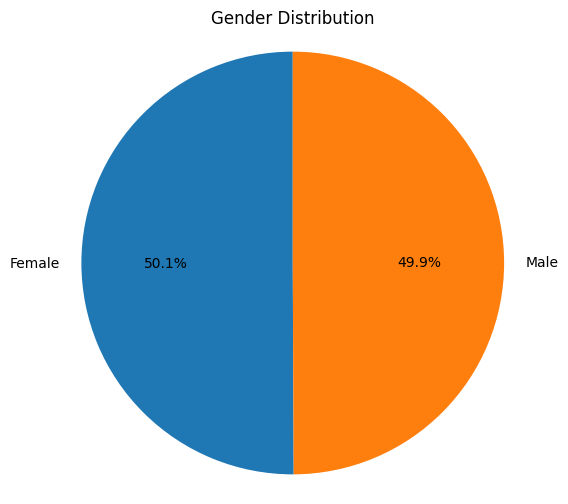

In [34]:
gender_counts = pandas_df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()


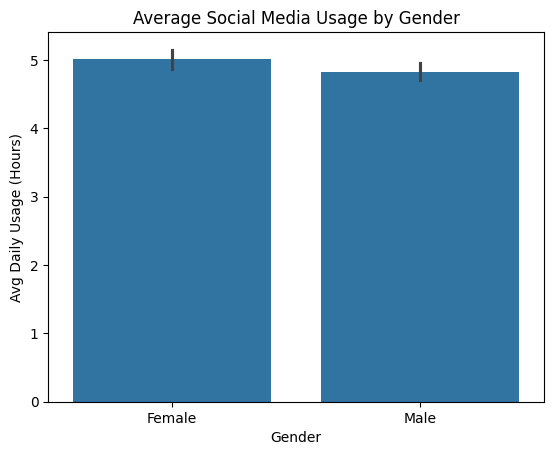

In [35]:
sns.barplot(data=pandas_df, x='Gender', y='Avg_Daily_Usage_Hours')
plt.title("Average Social Media Usage by Gender")
plt.ylabel("Avg Daily Usage (Hours)")
plt.show()


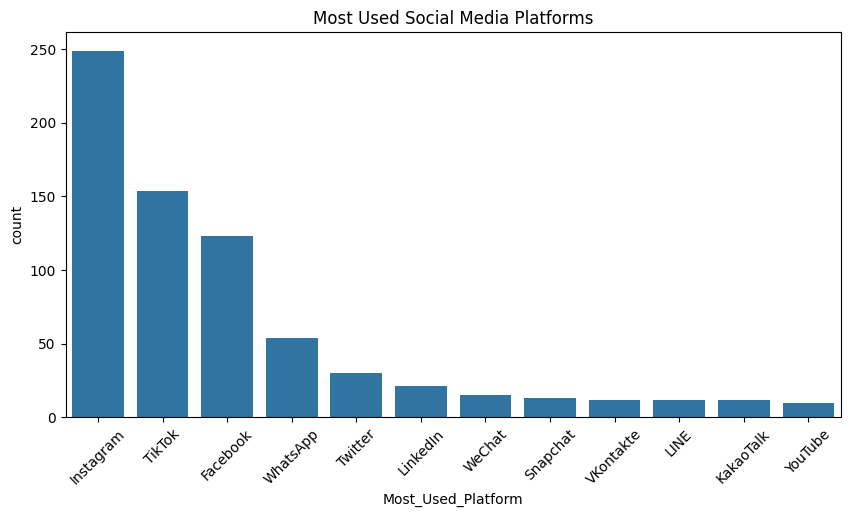

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=pandas_df, x='Most_Used_Platform', order=pandas_df['Most_Used_Platform'].value_counts().index)
plt.title("Most Used Social Media Platforms")
plt.xticks(rotation=45)
plt.show()


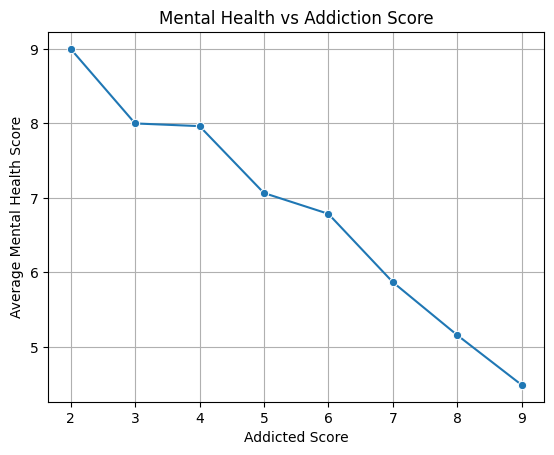

In [37]:
score_group = pandas_df.groupby('Addicted_Score')['Mental_Health_Score'].mean().reset_index()
sns.lineplot(data=score_group, x='Addicted_Score', y='Mental_Health_Score', marker='o')
plt.title("Mental Health vs Addiction Score")
plt.xlabel("Addicted Score")
plt.ylabel("Average Mental Health Score")
plt.grid(True)
plt.show()


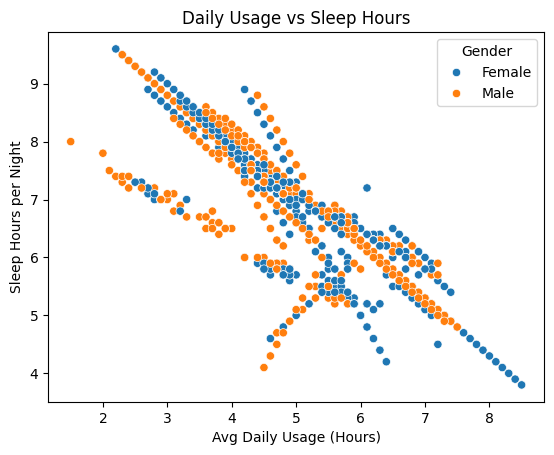

In [38]:
sns.scatterplot(data=pandas_df, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', hue='Gender')
plt.title("Daily Usage vs Sleep Hours")
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.show()


<ipython-input-39-15249610>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pandas_df, x='Affects_Academic_Performance', palette='Set2')


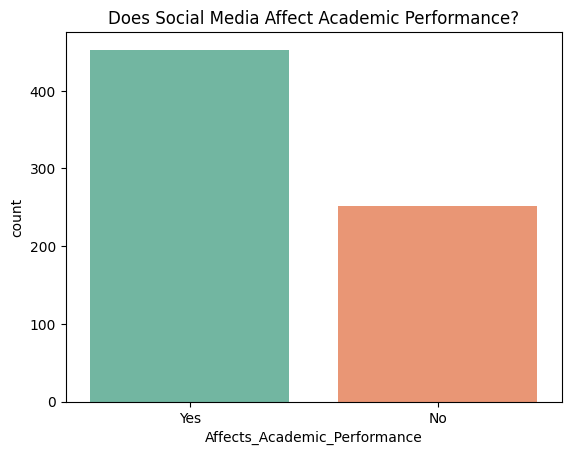

In [39]:
sns.countplot(data=pandas_df, x='Affects_Academic_Performance', palette='Set2')
plt.title("Does Social Media Affect Academic Performance?")
plt.show()
